# Projeto - Cálculo do diâmetro de um asteroide

#### Amanda Lucio, Nayara Gomes

O objetivo dos modelos é medir o diâmetro de um asteroide a partir de medidas sobre o mesmo. O *Dataset* utilizado será  **"Open Asteroid Dataset"** retirado do site https://www.kaggle.com.

Após baixar no Kaggle o arquivo *Asteroid_Updated.csv* contendo os dados sobre asteroides, vamos preparar nosso ambiente com as bibliotecas necessárias e depois importaremos os dados!

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
dataAsteroid = pd.read_csv('Data/Asteroid.csv')
dataAsteroid.head()

C:\Users\amand\AppData\Local\Programs\Python\Python38-32\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


### Variáveis do *Dataset*

In [10]:
dataAsteroid.columns



Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [31]:
columns = ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'diameter','albedo', 'rot_per','moid', 'n', 'per', 'ma']

dataAsteroid=dataAsteroid[columns]
dataAsteroid = dataAsteroid.dropna(subset=["diameter", "albedo", "data_arc"])  #removendo linhas com diâmetro null
dataAsteroid = dataAsteroid[pd.to_numeric(dataAsteroid['diameter'], errors='coerce').notnull()] #removendo linhas com valores não numéricos no diâmetro
dataAsteroid = dataAsteroid.astype(float)


### Detectar e Remover outliers

In [22]:
dataAsteroid.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,moid,n,per,ma
count,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000,11153.000000,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000
mean,2.779223,0.151047,9.627658,178.126408,175.622736,2.361635,3.196810,4.829628,18146.572540,1568.424153,13.337431,0.191062,23.567742,1.381655,0.234552,1764.021785,177.441134
std,1.182410,0.090524,6.914225,103.212009,103.573424,0.810528,1.773194,7.039047,11753.922041,762.840547,2.025789,0.142061,74.833025,0.800590,0.093663,2571.012096,103.289109
min,0.642196,0.001141,0.042710,0.000738,0.026563,0.092048,0.999956,0.514647,3.000000,51.000000,3.200000,0.008000,0.029952,0.000166,0.002489,187.974705,0.057141
25%,2.386761,0.091102,4.405836,92.787525,85.955141,1.987855,2.790069,3.687411,8780.000000,974.500000,12.300000,0.070000,4.670500,0.997347,0.187333,1346.826774,88.504819
50%,2.663592,0.139280,8.458102,171.779231,170.507396,2.264334,3.065584,4.347201,13976.000000,1561.000000,13.600000,0.171000,7.560000,1.279900,0.226727,1587.815061,175.094902
75%,3.025011,0.192696,13.063224,270.182325,266.079722,2.652795,3.394543,5.261369,24725.000000,2129.500000,14.600000,0.273000,14.583000,1.659545,0.267295,1921.714952,264.663173
max,53.920190,0.954480,118.969965,359.915763,359.988886,40.465671,105.385948,395.945419,72684.000000,9325.000000,29.900000,1.000000,1880.000000,39.507000,1.915151,144619.064198,359.989549


In [32]:
# Removendo outliers a partir dos valores acima
dataAsteroid = dataAsteroid[dataAsteroid.a < 20]
dataAsteroid = dataAsteroid[dataAsteroid.q < 6]
dataAsteroid = dataAsteroid[dataAsteroid.n_obs_used < 6000]
dataAsteroid = dataAsteroid[dataAsteroid.per_y < 15]
dataAsteroid = dataAsteroid[dataAsteroid.diameter < 400]
dataAsteroid = dataAsteroid.reset_index()

### Analisando correlações

In [33]:
corr_matrix = dataAsteroid.corr()
corr_matrix["diameter"].sort_values(ascending=False).head()

diameter      1.000000
data_arc      0.647487
n_obs_used    0.486019
a             0.336844
per           0.332031
Name: diameter, dtype: float64

<AxesSubplot:>

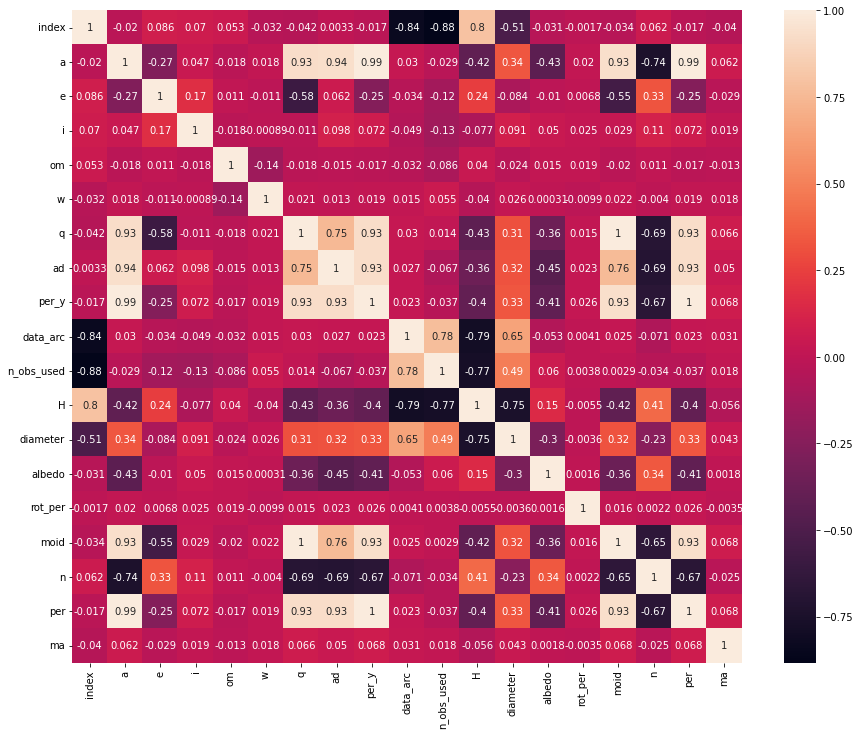

In [35]:
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix,annot=True,annot_kws={'size':10})

In [34]:
# Removendo colunas sem correlação

columns.remove("rot_per")
columns.remove("w")
columns.remove("om")
dataAsteroid = dataAsteroid[columns]

Desta forma, temos o seguinte modelo para estimar o diâmetro do asteroide:


**diameter = β0 + β1 × 'data_arc' + β2 ×'n_obs_used' + β3 × 'a'....**

### Regressão Linear

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **x** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino, nesse caso a coluna diameter.